# Chad asks ChatGPT4 for help learning B-Trees
#### (Or, 'In which Chad finds the limits of ChatGPT Advanced Data Analysis')

I semi-randomly(/ADDishly?) decided to look at B-Trees this morning.  I started, as one often does in the 20's, by asking ChatGPT4 about them.

### How can I build a mental model of how B-trees work?

A mental model of B-trees involves understanding them as self-balancing tree data structures that maintain sorted data in a way that allows for efficient insertion, deletion,and search operations. Unlike binary search trees, where each node has at most two children, B-trees allow for more than two children per node. The "B" in B-trees could be thought of as standing for "Balanced" or "Broad", reflecting the tree's ability to stay well-balanced and handle a broad range of child nodes.

Imagine you're working with a large set of sorted data, like a database index or a file system. If you use a simple array or linked list to store this data, operations like insertions and lookups could become very slow as the data set grows. Even with binary trees, if the data isn't well-distributed, you could end up with a skewed tree, making operations inefficient. B-trees mitigate these issues by keeping the tree balanced and spreading out each node into multiple children, thus reducing the height of the tree and consequently the number of disk accesses or recursive calls needed for common operations.

A B-tree of order \( t \) has the following properties:

1. Every node has at most \( 2t - 1 \) keys and at least \( t - 1 \) keys, except for the root, which can have as few as one key.
2. The keys within each node are sorted.
3. Each node points to \( n+1 \) children if it contains \( n \) keys.
4. All leaves are at the same level, ensuring the tree is balanced.
5. Insertions and deletions ensure the tree remains balanced, redistributing keys and occasionally splitting or merging nodes to maintain the B-tree properties.

To mentally simulate how B-trees operate, consider the following actions:

- **Searching**: Start from the root. Compare the key you're looking for with the keys in the current node. If the key matches, you've found it. If not, follow the child pointer that would bracket the key if it exists in the subtree rooted at that child. Repeat until you find the key or hit a leaf node.

- **Inserting**: Start from the root and find the right leaf node where the key should go. If the leaf node is not full, insert the key in its correct position. If the node is full, split it first and then proceed with the insertion. This may cause a recursive split upwards, possibly creating a new root.

- **Deleting**: Locate the key in the tree. If it's in a node that's not a leaf, it's a bit complicated—you'll need to find either the predecessor or successor key in the tree to replace it, and then delete that key instead. If the key is in a leaf node, you can generally remove it directly. After deletion, if any node has fewer than \( t-1 \) keys, you'll need to re-balance the tree by redistributing keys and possibly merging nodes.

The intuition behind B-trees is that they minimize the number of disk reads or writes, which is crucial for databases and file systems. By allowing more keys in each node, B-trees reduce the height of the tree and thus minimize the number of disk accesses required for various operations.

Understanding B-trees at this level should give you a solid mental model to work with, and you can delve into algorithmic details when you need to implement or optimize these structures in your software projects.

### Can you create diagrams, using Python code, to show the three actions?

(see code and diagrams below)

Here are the diagrams illustrating the three key actions on B-trees:

B-tree for Search Operation: This tree contains the keys 10, 20, 30, 40, and 50. When searching, you would start at the root node, which contains the keys 20 and 40. If you were looking for a key less than 20, you would traverse to the left child, which contains the key 10. For a key between 20 and 40, you'd move to the middle child containing the key 30, and for a key greater than 40, you'd go to the right child containing the key 50.

B-tree Before and After Insert Operation: Before insertion, the tree is identical to the search tree. To insert the key 35, you'd start at the root and move down to the child containing the keys 30. Since this node has room for another key, 35 is inserted there.

B-tree Before and After Delete Operation: Before deletion, the root node contains the keys 20 and (TIMEOUT, the first generation failed, ya'see...)

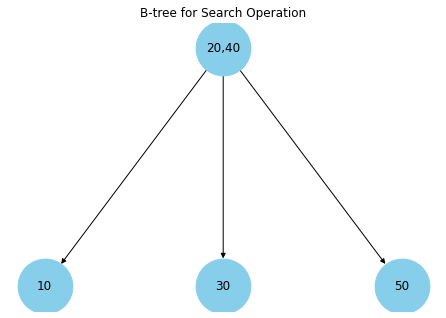

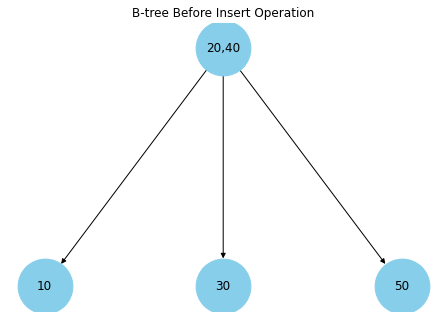

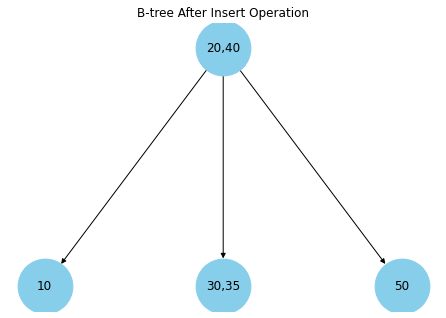

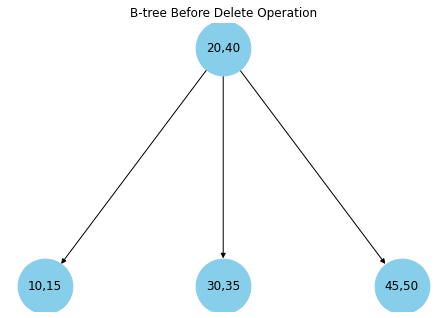

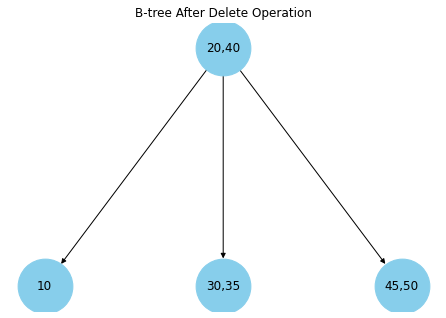

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Correct the code for drawing B-trees

def draw_btree(tree, pos=None, level=0, width=2., vert_gap=0.4, xcenter=0.5, parent=None):
    if pos is None:
        pos = {parent: (xcenter, 1 - level * vert_gap)}
    else:
        pos[parent] = (xcenter, 1 - level * vert_gap)
    neighbors = list(tree.neighbors(parent)) if parent is not None else []
    if len(neighbors) != 0:
        dx = width / (len(neighbors) + 1)
        nextx = xcenter - width / 2
        for neighbor in neighbors:
            nextx += dx
            pos[neighbor] = (nextx, 1 - (level + 1) * vert_gap)
            draw_btree(tree, pos, level + 1, dx, vert_gap, nextx, neighbor)
    return pos

# Create B-trees for search, insert, and delete operations
# For simplicity, we're using integers to represent nodes, and node attributes to hold the keys

# B-tree for Search
search_tree = nx.DiGraph()
search_tree.add_node(1, keys=[20, 40])
search_tree.add_node(2, keys=[10])
search_tree.add_node(3, keys=[30])
search_tree.add_node(4, keys=[50])
search_tree.add_edges_from([(1, 2), (1, 3), (1, 4)])

# B-tree for Insert (Before and After)
insert_tree_before = search_tree.copy()
insert_tree_after = nx.DiGraph()
insert_tree_after.add_node(1, keys=[20, 40])
insert_tree_after.add_node(2, keys=[10])
insert_tree_after.add_node(3, keys=[30, 35])
insert_tree_after.add_node(4, keys=[50])
insert_tree_after.add_edges_from([(1, 2), (1, 3), (1, 4)])

# B-tree for Delete (Before and After)
delete_tree_before = nx.DiGraph()
delete_tree_before.add_node(1, keys=[20, 40])
delete_tree_before.add_node(2, keys=[10, 15])
delete_tree_before.add_node(3, keys=[30, 35])
delete_tree_before.add_node(4, keys=[45, 50])
delete_tree_before.add_edges_from([(1, 2), (1, 3), (1, 4)])

delete_tree_after = nx.DiGraph()
delete_tree_after.add_node(1, keys=[20, 40])
delete_tree_after.add_node(2, keys=[10])
delete_tree_after.add_node(3, keys=[30, 35])
delete_tree_after.add_node(4, keys=[45, 50])
delete_tree_after.add_edges_from([(1, 2), (1, 3), (1, 4)])

# Function to plot the B-trees
def plot_btree(tree, title=""):
    pos = draw_btree(tree, parent=1)
    labels = {n: ','.join(str(i) for i in data['keys']) for n, data in tree.nodes(data=True)}
    nx.draw(tree, pos=pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue')
    plt.title(title)
    plt.show()

# Plot the B-trees
plot_btree(search_tree, "B-tree for Search Operation")
plot_btree(insert_tree_before, "B-tree Before Insert Operation")
plot_btree(insert_tree_after, "B-tree After Insert Operation")
plot_btree(delete_tree_before, "B-tree Before Delete Operation")
plot_btree(delete_tree_after, "B-tree After Delete Operation")


me:  Nice (I think) demo, but kind of a dumb one since it filled out the entire tree each time.  Let's see if it can do a better prompt...

### Can you implement B-Trees as a Python object for me?

In [3]:
# Implementing a simple B-Tree in Python

class Node:
    def __init__(self, t):
        self.keys = []
        self.children = []
        self.leaf = True
        self._t = t

class BTree:
    def __init__(self, t):
        self.root = Node(t)
        self._t = t

    def search(self, k, x=None):
        if isinstance(x, Node):
            i = 0
            while i < len(x.keys) and k > x.keys[i]:
                i += 1
            if i < len(x.keys) and k == x.keys[i]:
                return (x, i)
            elif x.leaf:
                return None
            else:
                return self.search(k, x=x.children[i])
        else:
            return self.search(k, x=self.root)

    def insert(self, k):
        root = self.root
        if len(root.keys) == (2 * self._t) - 1:
            temp = Node(self._t)
            temp.children.insert(0, self.root)
            self._split_child(temp, 0)
            self._insert_non_full(temp, k)
            self.root = temp
        else:
            self._insert_non_full(root, k)

    def _split_child(self, x, i):
        t = self._t
        y = x.children[i]
        z = Node(t)
        x.children.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])

        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]

        if not y.leaf:
            z.children = y.children[t: 2 * t]
            y.children = y.children[0: t - 1]

    def _insert_non_full(self, x, k):
        if x.leaf:
            x.keys.append(0)
            i = len(x.keys) - 1
            while i >= 1 and k < x.keys[i - 1]:
                x.keys[i] = x.keys[i - 1]
                i -= 1
            x.keys[i] = k
        else:
            i = len(x.keys) - 1
            while i >= 0 and k < x.keys[i]:
                i -= 1
            i += 1
            if len(x.children[i].keys) == (2 * self._t) - 1:
                self._split_child(x, i)
                if k > x.keys[i]:
                    i += 1
            self._insert_non_full(x.children[i], k)

# Test the BTree implementation
btree = BTree(3)

# Insert elements
elements = [10, 20, 5, 6, 12, 30, 7, 17]
for el in elements:
    btree.insert(el)

# Search for an element
result = btree.search(6)
if result:
    print(f"Element 6 found at node with keys {result[0].keys}")
else:
    print("Element 6 not found")

# Search for another element
result = btree.search(100)
if result:
    print(f"Element 100 found at node with keys {result[0].keys}")
else:
    print("Element 100 not found")


Element 6 not found
Element 100 not found


ChatGPT: It appears that there is an issue with the B-Tree implementation, as the search for the inserted element 6 did not return [NETWORK ERROR]

Me:  Well, *that* went well.  It didn't implement delete at all, or did insert correctly.

Still, this wasn't a terrible start for a Monday morning.